In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

import seaborn as sns
sns.set()

In [71]:
df = pd.read_csv("data/FuelConsumption.csv")
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [30]:
# sns.lmplot(x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", data=df, height=5, aspect=4, x_jitter=.9, y_jitter=.9)

In [31]:
# sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df)

<AxesSubplot:xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

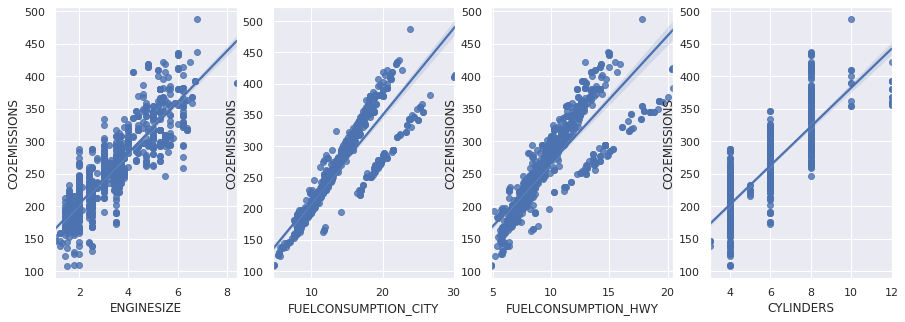

In [72]:
fig, ax = plt.subplots(1,4, figsize=(15,5))
sns.regplot(x='ENGINESIZE', y='CO2EMISSIONS', ax=ax[0], data=df)
sns.regplot(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', ax=ax[1], data=df)
sns.regplot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', ax=ax[2], data=df)
sns.regplot(x='CYLINDERS', y='CO2EMISSIONS', ax=ax[3], data=df)

<AxesSubplot:>

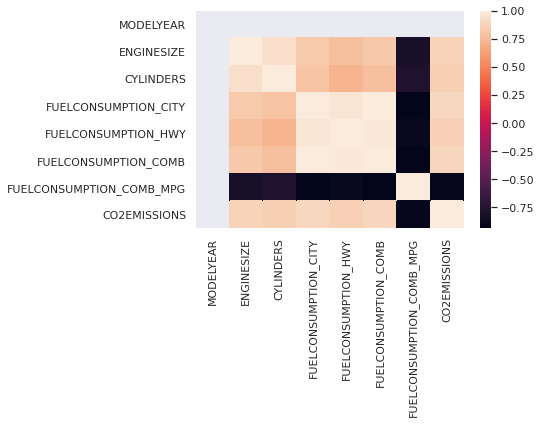

In [73]:
sns.heatmap(df.corr())

In [90]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


# write your code here
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_train = np.asanyarray(train_set[['CO2EMISSIONS']])

regr.fit (x_train, y_train)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

x_test = np.asanyarray(test_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y_test = np.asanyarray(test_set[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y_test) ** 2))
# print('Variance score: %.2f' % regr.score(x_test, y_test))
print('Variance score: {}'.format(regr.score(x_test, y_test)))

#TODO: Create table with predicted data


Coefficients:  [[11.23567565  7.0089373   5.59604353  3.81386072]]
Residual sum of squares: 511.51
Variance score: 0.8762951250717914


In [76]:
import statsmodels.api as sm

X = sm.add_constant(train_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = train_set['CO2EMISSIONS']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1308.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:40:35   Log-Likelihood:                -3905.0
No. Observations:                 853   AIC:                             7820.
Df Residuals:                     848   BIC:                             7844.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   67.8271      3.730     18.186      0.000      60.507      75.147
ENGINESIZE              11.2357      1.784      6.298      0.000       7.734      14.737
CYLINDERS                7.0089      1.306      5.368      0.000       4.446       9.572
FUELCONSUMPTION_CITY     5.5960      0.920      6.081      0.000       3.790       7.402
FUELCONSUMPTION_HWY      3.8139      1.177      3.240      0.001       1.503       6.124
==============================================================================
Omnibus:                       38.599   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.676
Skew:                          -0.374   Prob(JB):                     1.10e-13
Kurtosis:                       4.058   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

pred = pipe.fit(x_train, y_train)
result_y_pred = pipe.predict(test_set[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

print("Residual sum of squares: %.2f"% np.mean((result_y_pred - y_test) ** 2))
print('Variance score: {}'.format(pred.score(x_test, y_test)))


Residual sum of squares: 511.51
Variance score: 0.8762951250717914
